# <center> 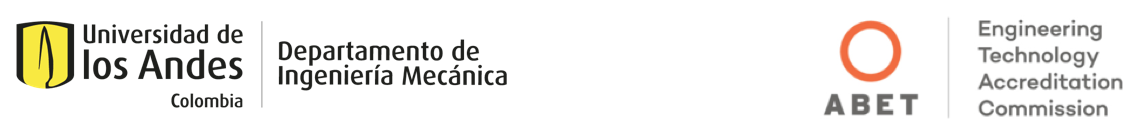
## <span style="color: #147CA6"><center> IMEC 2001-Herramientas Computacionales
## <span style="color: #1AA3D9"><center> Taller 6-Sistemas de ecuaciones

### <span style="color: #147CA6">Fecha Límite de Entrega (Bloque Neón): <font color="#1AA3D9">TODO</font>
___
### <span style="color: #147CA6"> Descripción de la actividad

La actividad tiene como objetivodemostrar su manejo en el uso de métodos numéricos para resolver sistemas de ecuaciones.

### <span style="color: #147CA6"> Tener en Cuenta

1. Enviar vía Bloque Neón el archivo en Jupyter Notebook (extensión <font color="#1AA3D9">'.ipynb'</font>).

**Nota:** <font color="#1AA3D9">El nombre del archivo debe ser: `Taller6_NombreApellido1_NombreApellido2.ipynb`.</font>

---

### <span style="color: #1AA3D9"><center> Item 1: Diferencias finitas.

Las diferencias  finitas  son  métodos  matemáticos  cuya  implementación  termina  siendo computacional,  y  funcionan  para  aproximar  problemas  que  analíticamente  son  muy difíciles de resolver salvo algunos casos triviales (los cuales usualmente no aplican en la ingeniería). En  la  ingeniería  mecánica,  el  método  de  diferencias  finitas se  utiliza para  analizar  la transferencia  de  calor en  superficies  bidimensionales  y cuerpos tridimensionales.La resolución de estas diferencias nos permitirá conocer la temperatura en una superficie de forma discreta, es decir, no sabremos la temperatura en toda la superficie, sino solo en algunos puntos, pero no sabremos que pasa entre puntos.

A continuación encontrará una imagen que ilustra las diferencias finitas:

# <center> 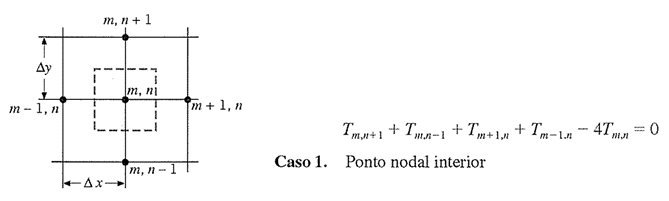
#### <center> Figura 1. Diferencias finitas de puntos centrales. <a href="https://uniandes.primo.exlibrisgroup.com/discovery/fulldisplay?context=PC&vid=57U_UDLA:UDLA&search_scope=MyInst_and_CI&tab=Todo&docid=cdi_istex_primary_ark_67375_WNG_8X5TLX92_J">Incropera</a>

Esta relación nos permite conocer la temperatura de un nodo central si conozco la temperatura de sus cuatro “nodos vecinos”.A continuación, encontrará una malla de diferencias finitas que tendrá que resolver:

# <center>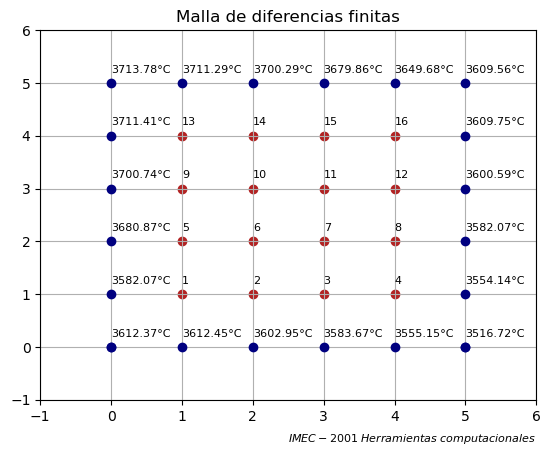

Para cada uno de los nodos rojos, plantee las ecuaciones de la figura 1 y genere un sistema de ecuaciones. Resuelva el sistema de forma numérica (métodos de numpy, no cálculo simbólico). Plantee las ecuaciones y su sistema de forma tal que las temperaturas en el vector solución coincidan con la numeración de los nodos.


### <span style="color: #1AA3D9"><center> Bono+1.0:

Grafique la temperatura en la placa con líneas de contorno ¿En qué dirección está fluyendo el calor? Para que el bono sea válido se tienen que resolver las temperaturas de los nodos, de lo contrario el bono no será válido. 

<span style="color: #1AA3D9"> Hint:</span> Para resolver el bono le podrían ser de utilidad las funciones <span style="color: #1AA3D9">np.meshgrid()</span>y <span style="color: #1AA3D9">plt.contourf()</span>, sin embargo usted es libre de resolverlo con otras funciones o herramientas en Python.


<span style="color: #1AA3D9">Importante:</span> Este solo es el esquema más básico de diferencias finitas, sin embargo, este modelo matemático se formaliza mejor en Termofluidos II.


___
### <span style="color: #1AA3D9"><center> Item 2: Serchas

# <center> 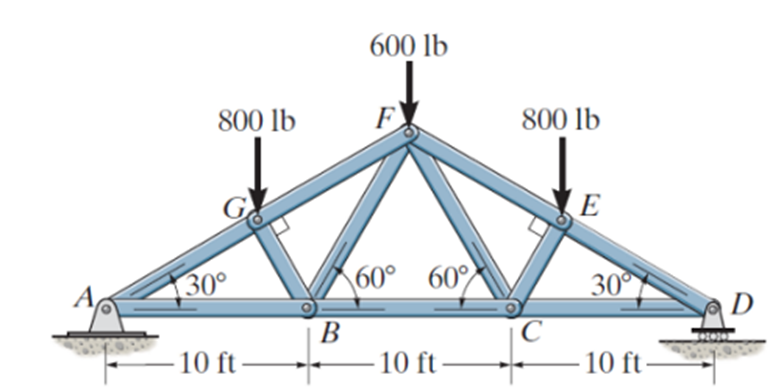

Encuentre las fuerzas que actúan en cada elemento de la cercha con un sistema de ecuaciones. Igualmente, encuentre las reacciones en los apoyos A y D. Utilice un sistema de ecuaciones simbólico y resuelva con sympy.solve()

In [37]:
import sympy as sp
Ax, Ay, Dy = sp.symbols('Ax Ay Dy')

#fuerzas
f_g = 800   
f_f = 600   
f_e = 800   

#coordenadas
A = (0,0)
B = (10,0)
C = (20,0)
D = (30,0)
G = (7.5, 4.3301)
F = (15, 8.6602)
E = (22.5, 4.3301)

#reacciones en A y D
M_a =sp.Eq(Dy*30-f_f*15-f_g*7.5-f_e*22.5,0)
eq_x=sp.Eq(Ax, 0)
eq_y=sp.Eq(Ay+Dy-f_f-f_g-f_e , 0)


sol = sp.solve([eq_x, eq_y, M_a], (Ax, Ay, Dy))
print("Reacciones en apoyos:")
for var, val in sol.items():
    print(f"{var} = {float(val):.2f}")


Reacciones en apoyos:
Ax = 0.00
Ay = 1100.00
Dy = 1100.00


In [38]:
import sympy as sp

ab,ag,bc,bg,bf,cf,ce,cd,gf,fe,ed = sp.symbols('ab ag bc bg bf cf ce cd gf fe ed')
f_g,f_f,f_e = sp.symbols('f_g f_f f_e')  

eq_Ax = sp.Eq(Ax + ab*1 + ag*0.866, 0)
eq_Ay = sp.Eq(Ay + ag*0.5, 0)

#nudo b
eq_Bx = sp.Eq(-ab + bc + bg*-0.5 + bf*0.5, 0)
eq_By = sp.Eq(bg*0.866 + bf*0.866, 0)

#nudo c
eq_Cx = sp.Eq(-bc + cd -0.5*cf +0.5*ce, 0)
eq_Cy = sp.Eq(0.866*cf + 0.866*ce, 0)

#nudo d
eq_Dx = sp.Eq(-cd -0.866*ed, 0)
eq_Dy = sp.Eq(Dy +0.5*ed, 0)

#nudo g
eq_Gx = sp.Eq(-0.866*ag+0.5*bg +0.866*gf, 0)
eq_Gy = sp.Eq(-0.5*ag -0.866*bg +0.5*gf - f_g, 0)

#nudo f
eq_Fx = sp.Eq(-0.5*bf +0.5*cf -0.866*gf +0.866*fe, 0)
eq_Fy = sp.Eq(-0.866*bf -0.866*cf -0.5*gf -0.5*fe - f_f, 0)

#nudo e
eq_Ex = sp.Eq(-0.5*ce -0.866*fe +0.866*ed, 0)
eq_Ey = sp.Eq(-0.866*ce +0.5*fe -0.5*ed - f_e, 0)

ecuaciones = [
    eq_Ax, eq_Ay,
    eq_Bx, eq_By,
    eq_Cx, eq_Cy,
    eq_Dx, eq_Dy,
    eq_Gx, eq_Gy,
    eq_Fx, eq_Fy,
    eq_Ex, eq_Ey
]


incognitas = [Ax,Ay,Dy,ab,ag,bc,bg,bf,cf,ce,cd,gf,fe,ed]

valores = {f_g:800, f_f:600, f_e:800}

ecuaciones_num = [eq.subs(valores) for eq in ecuaciones]
sol = sp.solve(ecuaciones_num, incognitas)

print("Resultados:")
for var in incognitas:
    print(f"{var} = {sol[var].evalf():.2f}")


Resultados:
Ax = 0.00
Ay = 1100.00
Dy = 1100.00
ab = 1905.20
ag = -2200.00
bc = 1212.37
bg = -692.83
bf = 692.83
cf = 692.83
ce = -692.83
cd = 1905.20
gf = -1799.98
fe = -1799.98
ed = -2200.00
